## Cancer Remission and Cell Activity Prediction using the Naive Bayes Classifier Approach

#### Part 1: Data Preprocessing

In [19]:
# import the Libraries
import numpy as np                       # used for multidimensional array
import pandas as pd                      # used for import the dataset
import matplotlib.pyplot as plt          # used for Visulising the result

In [20]:
# import the dataset
dataset= pd.read_csv('remission.csv')
X= dataset.iloc[:,:-1].values     # predictor attribute
y= dataset.iloc[:,-1].values     # targer attribute

In [21]:
# split the dataset into test set and train  set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

#### Part 2: Building the Naive Bayes Model

In [22]:
# import the Naive Bayes model from scikit learn
from sklearn.naive_bayes import GaussianNB

In [23]:
# initialize the Naive Bayes Model
classifier = GaussianNB()

In [24]:
#fit the Naive Bayes Model
classifier.fit(X_train,y_train)

GaussianNB(priors=None)

#### Part 3: Predicted the result and Visualize the result

In [25]:
# Predicted the result
y_pred=classifier.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0], dtype=int64)

In [26]:
# Making  a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[5, 1],
       [0, 0]], dtype=int64)

In [27]:
# check the accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred)
ac

0.8333333333333334

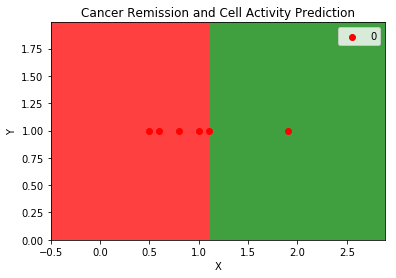

In [28]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Cancer Remission and Cell Activity Prediction')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()